### predict path/benign w/ mpc score
* hold out one gene at a time?

In [15]:
import pandas
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
%matplotlib inline

In [19]:
f = '../data/interim/sig_flagged/EPIv6.eff.dbnsfp.anno.hHack.splitPfam.all.dat'
df_pre = pandas.read_csv(f, delimiter='\t')

# not VUS, and mpc needs to be available
df = df_pre[ (df_pre.clin_class != 'VUS') & (df_pre.mpc>0)]
df.loc[:, 'y'] = df.apply(lambda row: 1 if row['clin_class'] in ('PATHOGENIC', 'LIKLEY_PATHOGENIC')
                          else 0, axis=1)
df.head()

/opt/conda/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.4/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.4/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,chrom,pos,ref,alt,clin_class,pfam,af_1kg_all,eff,pos_fam,neg_fam,gene,mpc,all_fg_gtr,all_qval,y
6,1,40542572,T,C,PATHOGENIC,Palm_thioest:3,0.000000,missense_variant,2,8544,PPT1,0.6458,True,0.043341,1
16,1,40555089,G,C,PATHOGENIC,Palm_thioest:6,0.000000,missense_variant,1,8544,PPT1,0.6009,False,0.053245,1
17,1,40555089,G,C,PATHOGENIC,Palm_thioest:7,0.000000,missense_variant,1,8544,PPT1,0.6009,False,0.053245,1
22,1,40557070,T,A,PATHOGENIC,Palm_thioest:9,0.000599,missense_variant,2,8543,PPT1,0.5571,False,0.000233,1
24,1,40557754,A,C,PATHOGENIC,Palm_thioest:10,0.000000,missense_variant,1,8544,PPT1,0.7771,True,0.799538,1


In [20]:
df.groupby(['gene', 'y']).size()

gene      y
ADSL      0     101
          1    1010
ALDH7A1   0     105
          1      14
ARX       0     404
          1       1
ATP1A2    0       4
          1     105
ATP6AP2   0     103
CACNB4    0       2
CDKL5     0     406
          1     133
CHRNA2    0     110
CHRNA4    0     416
          1       2
CHRNB2    0       7
          1       2
CLN3      0       6
          1       1
CLN5      0     909
          1     303
CLN6      0     505
          1     606
CLN8      0     202
          1     101
CNTNAP2   0     823
CSTB      0       3
CTSD      0     205
          1       2
EFHC1     0     405
               ... 
PRRT2     0     404
          1     101
SCARB2    0       3
SCN1A     0     404
          1    4026
SCN1B     0     406
          1       7
SCN2A     0     305
          1    1054
SCN8A     1    1023
SLC25A22  0       9
SLC2A1    1      50
SLC9A6    0     203
          1     102
SPTAN1    0     950
          1       2
SRPX2     0     306
STXBP1    0       6
        

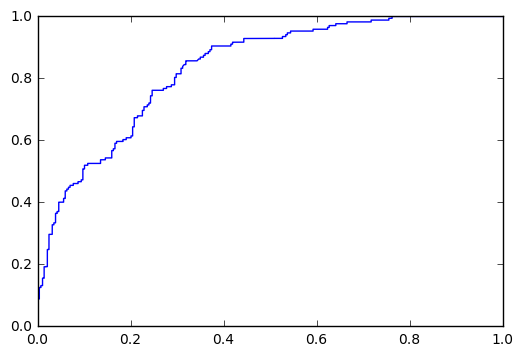

In [21]:
scores = df['mpc'].values
truth = df['y'].values
fpr, tpr, thresh_roc = metrics.roc_curve(truth, scores, pos_label=1)
pre, rec, thresh_pr = metrics.precision_recall_curve(truth, scores, pos_label=1)
plt.plot(fpr, tpr)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ce6ab0748>]], dtype=object)

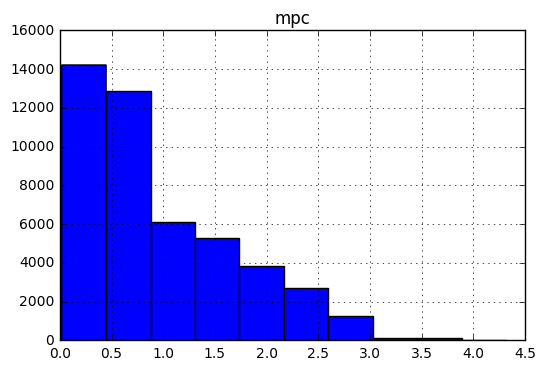

In [22]:
df.hist(column='mpc')